In [1]:
#Only uncomment if PuLP is not installed on local computer
#!pip install pulp

In [2]:
from pulp import *
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value

tasks = {
    "A": {"name": "Describe product", "best_case": 10, "expected": 18, "worst_case": 25},
    "B": {"name": "Develop marketing strategy", "best_case": 6, "expected": 20, "worst_case": 22},
    "C": {"name": "Design brochure", "best_case": 3, "expected": 6, "worst_case": 10},
    "D1": {"name": "Requirements analysis", "best_case": 15, "expected": 30, "worst_case": 60},
    "D2": {"name": "Software design", "best_case": 10, "expected": 15, "worst_case": 20},
    "D3": {"name": "System design", "best_case": 9, "expected": 10, "worst_case": 18},
    "D4": {"name": "Coding", "best_case": 65, "expected": 100, "worst_case": 170},
    "D5": {"name": "Write documentation", "best_case": 25, "expected": 30, "worst_case": 50},
    "D6": {"name": "Unit testing", "best_case": 25, "expected": 50, "worst_case": 72},
    "D7": {"name": "System testing", "best_case": 20, "expected": 23, "worst_case": 30},
    "D8": {"name": "Package deliverables", "best_case": 6, "expected": 10, "worst_case": 20},
    "E": {"name": "Survey potential market", "best_case": 20, "expected": 50, "worst_case": 70},
    "F": {"name": "Develop pricing plan", "best_case": 10, "expected": 15, "worst_case": 20},
    "G": {"name": "Develop implementation plan", "best_case": 15, "expected": 26, "worst_case": 35},
    "H": {"name": "Write client proposal", "best_case": 9, "expected": 15, "worst_case": 20}
}


predecessors = {
    "A": [],
    "B": [],
    "C": ["A"],
    "D1": ["A"],
    "D2": ["D1"],
    "D3": ["D1"],
    "D4": ["D2", "D3"],
    "D5": ["D4"],
    "D6": ["D4"],
    "D7": ["D6"],
    "D8": ["D5", "D7"],
    "E": ["B", "C"],
    "F": ["D8", "E"],
    "G": ["A", "D8"],
    "H": ["F", "G"]
}

--- BEST_CASE SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 175.0 hours in duration

Solution variable values:
end_A = 10.0
end_B = 6.0
end_C = 13.0
end_D1 = 25.0
end_D2 = 35.0
end_D3 = 34.0
end_D4 = 100.0
end_D5 = 125.0
end_D6 = 125.0
end_D7 = 145.0
end_D8 = 151.0
end_E = 33.0
end_F = 161.0
end_G = 166.0
end_H = 175.0
start_A = 0.0
start_B = 0.0
start_C = 10.0
start_D1 = 10.0
start_D2 = 25.0
start_D3 = 25.0
start_D4 = 35.0
start_D5 = 100.0
start_D6 = 100.0
start_D7 = 125.0
start_D8 = 145.0
start_E = 13.0
start_F = 151.0
start_G = 151.0
start_H = 166.0


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


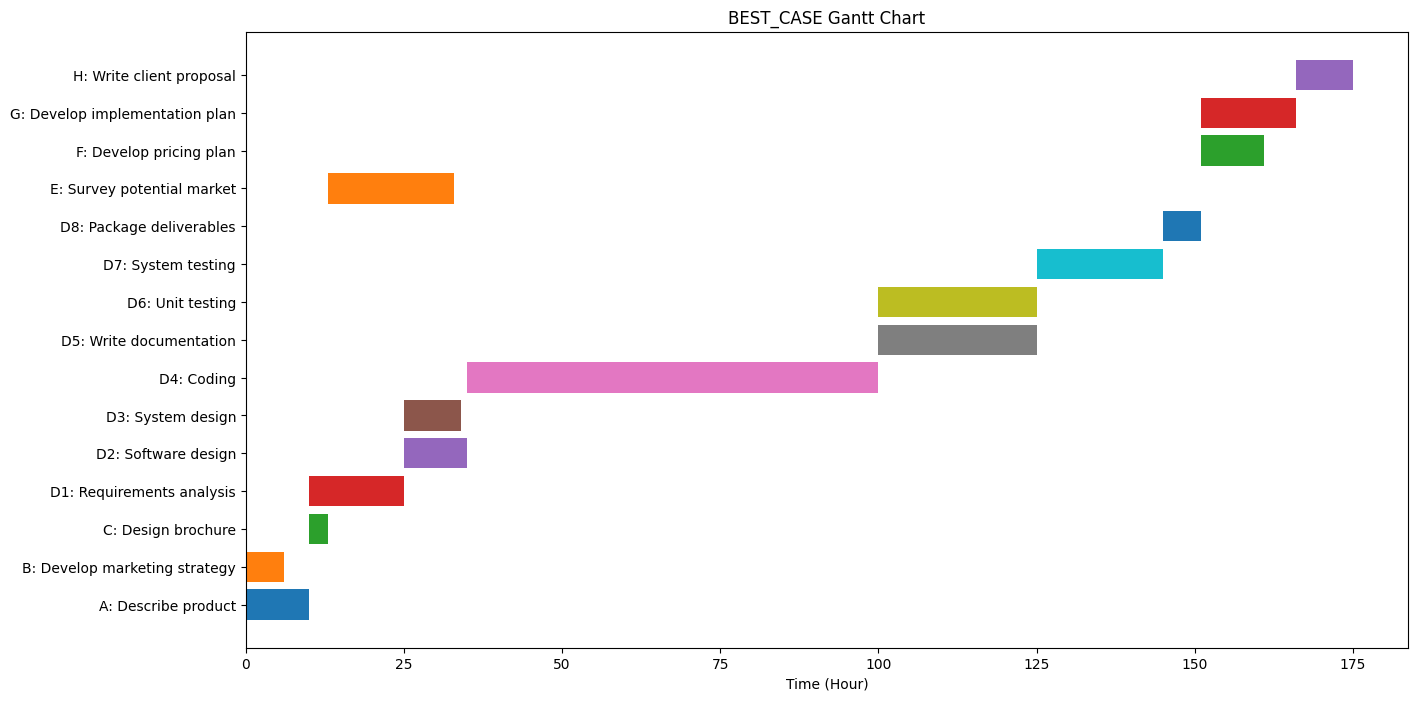


--- EXPECTED SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 287.0 hours in duration

Solution variable values:
end_A = 18.0
end_B = 20.0
end_C = 24.0
end_D1 = 48.0
end_D2 = 63.0
end_D3 = 58.0
end_D4 = 163.0
end_D5 = 193.0
end_D6 = 213.0
end_D7 = 236.0
end_D8 = 246.0
end_E = 74.0
end_F = 261.0
end_G = 272.0
end_H = 287.0
start_A = 0.0
start_B = 0.0
start_C = 18.0
start_D1 = 18.0
start_D2 = 48.0
start_D3 = 48.0
start_D4 = 63.0
start_D5 = 163.0
start_D6 = 163.0
start_D7 = 213.0
start_D8 = 236.0
start_E = 24.0
start_F = 246.0
start_G = 246.0
start_H = 272.0


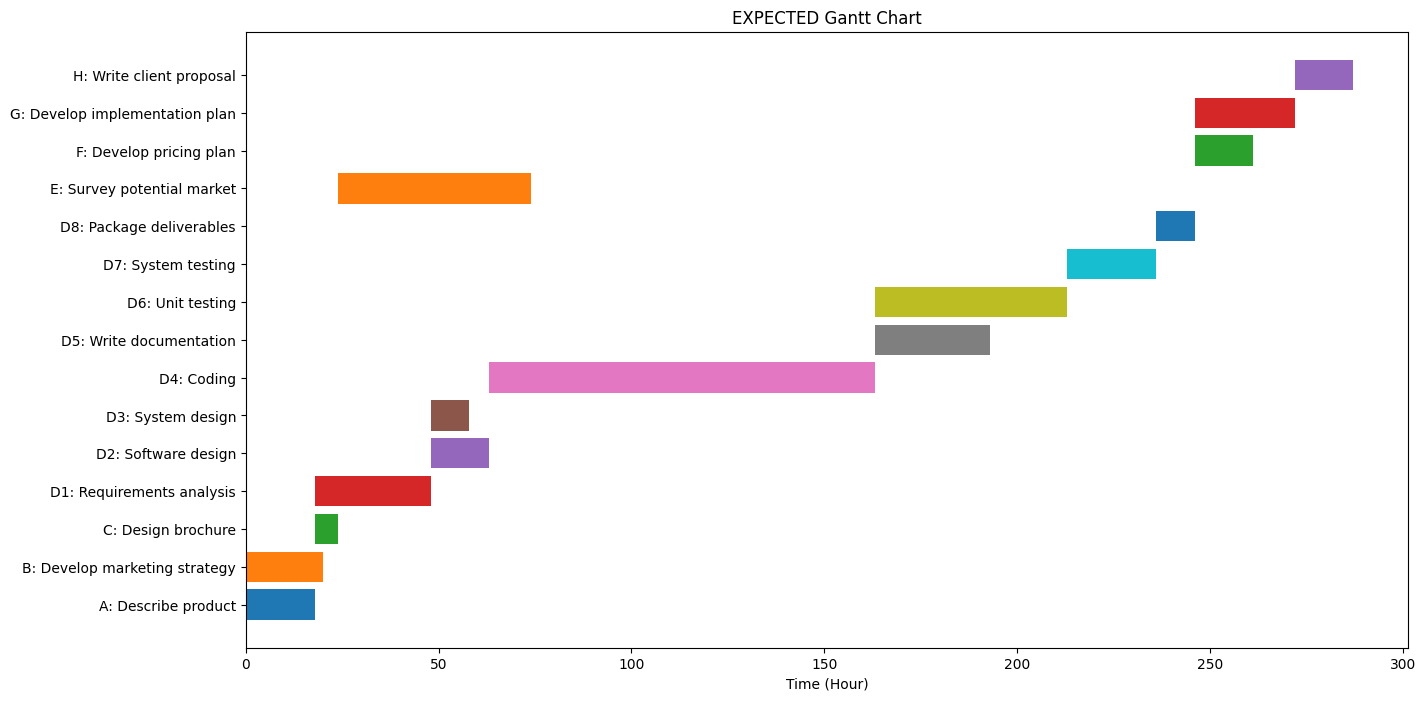


--- WORST_CASE SCENARIO ---
Critical Path time:
A starts at time 0
B starts at time 0
H ends at 452.0 hours in duration

Solution variable values:
end_A = 25.0
end_B = 22.0
end_C = 35.0
end_D1 = 85.0
end_D2 = 105.0
end_D3 = 103.0
end_D4 = 275.0
end_D5 = 325.0
end_D6 = 347.0
end_D7 = 377.0
end_D8 = 397.0
end_E = 105.0
end_F = 417.0
end_G = 432.0
end_H = 452.0
start_A = 0.0
start_B = 0.0
start_C = 25.0
start_D1 = 25.0
start_D2 = 85.0
start_D3 = 85.0
start_D4 = 105.0
start_D5 = 275.0
start_D6 = 275.0
start_D7 = 347.0
start_D8 = 377.0
start_E = 35.0
start_F = 397.0
start_G = 397.0
start_H = 432.0


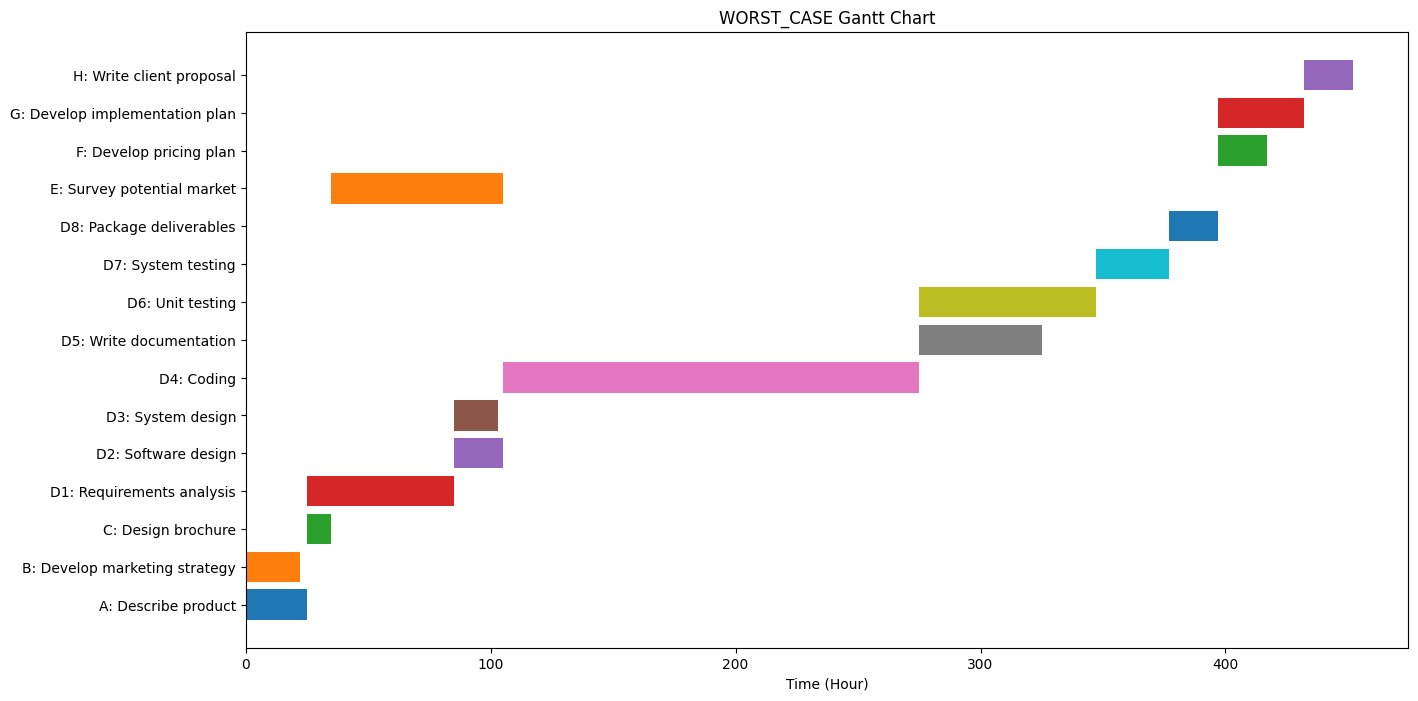

In [3]:
def critical_path_analysis(activities, predecessors, scenario="expected"):
    # Create a list of the activities
    activities_list = list(activities.keys())
    # Create the LP problem
    prob = LpProblem("Critical Path", LpMinimize)

    # Create the LP variables
    start_times = {activity: LpVariable(f"start_{activity}", 0, None) for activity in activities_list}
    end_times = {activity: LpVariable(f"end_{activity}", 0, None) for activity in activities_list}

    # Add the constraints
    for activity in activities_list:
        # Access the duration for the current scenario
        duration = activities[activity][scenario]
        prob += end_times[activity] == start_times[activity] + duration, f"{activity}_duration"
        for predecessor in predecessors[activity]:
            prob += start_times[activity] >= end_times[predecessor], f"{activity}_predecessor_{predecessor}"

    # Set the objective function
    prob += lpSum([end_times[activity] for activity in activities_list]), "minimize_end_times"

    # Solve the LP problem
    status = prob.solve()

    # Print the results
    print("Critical Path time:")
    for activity in activities_list:
        if value(start_times[activity]) == 0:
            print(f"{activity} starts at time 0")
        if value(end_times[activity]) == max([value(end_times[activity]) for activity in activities_list]):
            print(f"{activity} ends at {value(end_times[activity])} hours in duration")

    # Print solution
    print("\nSolution variable values:")
    for var in prob.variables():
        if var.name != "_dummy":
            print(var.name, "=", var.varValue)

    # Prepare data for Gantt chart
    gantt_data = []
    for activity in activities_list:
        start = value(start_times[activity])
        end = value(end_times[activity])
        gantt_data.append((activity, start, end - start))

    # Plot Gantt chart
    fig, ax = plt.subplots(figsize=(15, 8))
    for i, (task, start, duration) in enumerate(gantt_data):
      task_label = f"{task}: {activities[task]['name']}"
      ax.barh(task_label, duration, left=start, align='center')

    ax.set_xlabel('Time (Hour)')
    ax.set_title(f'{scenario.upper()} Gantt Chart')
    plt.show()

# Calculate and print the critical path for each scenario
scenarios = ["best_case", "expected", "worst_case"]
for scenario in scenarios:
    print(f"--- {scenario.upper()} SCENARIO ---")
    critical_path_analysis(tasks, predecessors, scenario)
    print()